<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment08_20150711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

In [160]:
def normalize_data(x,y):
  xn = (x - np.mean(x)) / np.std(x)
  yn = (y - np.mean(y)) / np.std(y)
  return xn, yn

def compute_covariance(xn,yn):
  n = len(xn)
  Z = np.empty((n,2))
  Z[:,0] = xn
  Z[:,1] = yn
  covar = np.cov(Z.T)
  return covar

def compute_principal_direction(covariance):
  eigen_val,eigen_vec = np.linalg.eig(covariance)
  direction = (eigen_vec * eigen_val).T
  return direction

def compute_projection(point, axis):
  projection = np.dot(point,axis)
  return projection

In [146]:
xn, yn = normalize_data(x,y)
covar = compute_covariance(xn,yn)
print(covar)
direction = compute_principal_direction(covar)

[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]


In [161]:
eigen_val, eigen_vec = np.linalg.eig(covar)
print(eigen_val)
print(eigen_vec.T)
eigen_vec.T[0]

ndata = np.empty((50,2))
ndata[:,0] = xn
ndata[:,1] = yn
proj_1 = compute_projection(ndata, eigen_vec.T[0])
proj_2 = compute_projection(ndata, eigen_vec.T[1])

[1.77094898 0.26986734]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [162]:
proj_1

array([-1.49631573,  0.92218448, -1.22439641, -1.64386667, -1.27321784,
        0.97681765, -1.2688078 ,  2.34148397,  0.0299913 ,  0.78172091,
        0.63167593,  0.55280211,  0.08967664,  0.5258584 , -1.56415227,
        1.91610013,  0.88679644, -0.95607294,  2.32996005,  0.47793672,
        2.21747241, -0.38900956,  1.78482705, -0.05175329, -1.66512212,
       -0.5081321 ,  1.23711116,  1.17198554, -0.84221394,  0.00693221,
        0.2279369 ,  1.51309444, -1.33874162,  0.59252508, -0.67907294,
        1.35297995, -1.68749214,  1.39236004, -2.55992269,  0.27850072,
        0.97677403, -0.88819936, -1.29666362,  0.98966708, -1.81272102,
        0.27196377, -3.19298107, -1.21299033, -0.36792473,  1.44263507])

# **[output] plot the original data points**

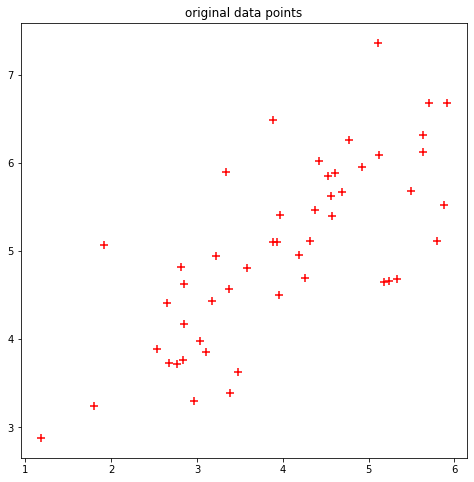

In [149]:
plt.figure(figsize = (8,8))
plt.scatter(x, y , color = "red", marker = '+', s = 80)
plt.title("original data points")
plt.show()

# **[output] plot the normalized data points**

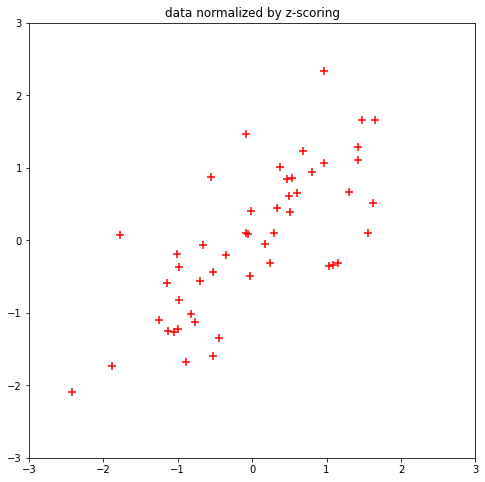

In [150]:
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.title("data normalized by z-scoring")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the principal axes**

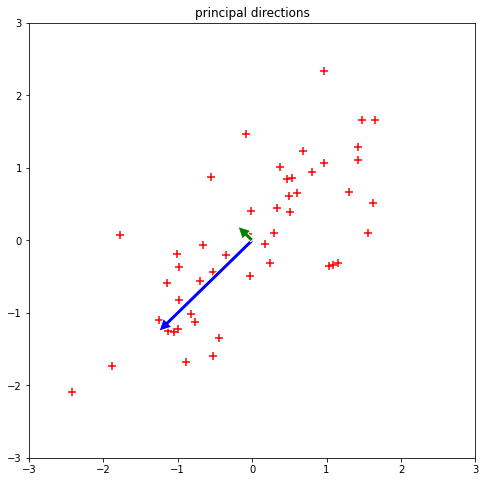

In [151]:
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.annotate("",xy = -direction[0], xytext = (0,0), arrowprops = dict(fc = "blue",ec = "white"))
plt.annotate("",xy = direction[1], xytext = (0,0), arrowprops = dict(fc = "green", ec = "white"))
plt.title("principal directions")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the first principal axis**

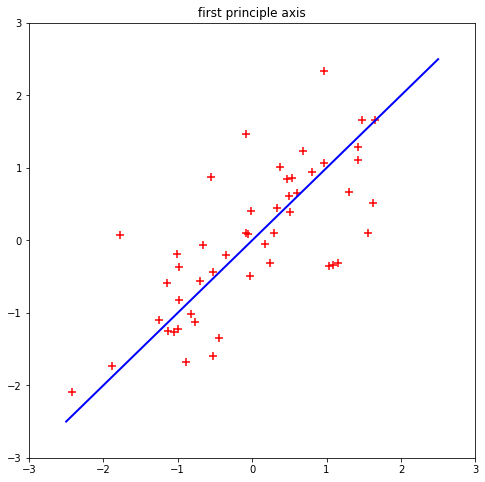

In [152]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.plot(xx, xx, linewidth = 2, c = "blue")
plt.title("first principle axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the project of the normalized data points onto the first principal axis**

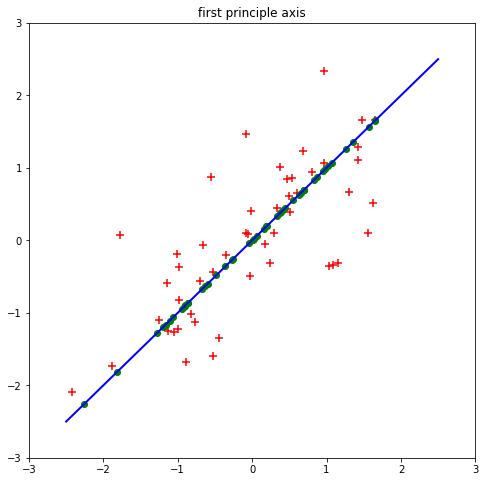

In [164]:
xx = np.linspace(-2.5,2.5,100)
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.plot(xx, xx, linewidth = 2, c = "blue")
plt.scatter(proj_1*eigen_vec.T[0][0],proj_1*eigen_vec.T[0][1],c = "green")
plt.title("first principle axis")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()